Reading file

In [1]:
import pandas as pd

file_path = 'diabetes_scale.txt' 
data = [line.strip().split() for line in open(file_path, 'r')]

num_features = 8 
labels = [int(row[0]) for row in data]  
features = [[float(item.split(":")[1]) for item in row[1:]] for row in data]  # Extracting features

df = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(num_features)])
df.insert(0, 'label', labels)  # labels as the first column

df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


Creating Perceptron model

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000, penalty=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.penalty = penalty 
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initializing weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, -1) 

                if y_predicted != y[idx]:
                    update = self.learning_rate * y[idx]
                    self.weights += update * x_i
                    self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Function for cross-validation and evaluation metrics
def cross_val_perceptron(X, y, learning_rate, max_iter, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'conf_matrices': []
    }
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Training the perceptron
        model = Perceptron(learning_rate=learning_rate, max_iter=max_iter)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        fold_metrics['accuracy'].append(accuracy)
        fold_metrics['precision'].append(precision)
        fold_metrics['recall'].append(recall)
        fold_metrics['f1_score'].append(f1)
        fold_metrics['conf_matrices'].append(conf_matrix)
        
        print(f"Fold {fold+1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    
    # Plot confusion matrix for the last fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Learning Rate: {learning_rate}, Max Iter: {max_iter})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'confusion_matrix_lr_{learning_rate}_iter_{max_iter}.png')
    plt.show()
    
    return fold_metrics



Training with Learning Rate: 0.001, Max Iterations: 100
Fold 1, Accuracy: 0.5974, Precision: 0.8936, Recall: 0.4242, F1-Score: 0.5753
Fold 2, Accuracy: 0.7403, Precision: 0.7638, Recall: 0.9065, F1-Score: 0.8291
Fold 3, Accuracy: 0.4286, Precision: 0.8571, Recall: 0.0645, F1-Score: 0.1200
Fold 4, Accuracy: 0.5229, Precision: 1.0000, Recall: 0.3113, F1-Score: 0.4748
Fold 5, Accuracy: 0.6340, Precision: 0.9149, Recall: 0.4526, F1-Score: 0.6056


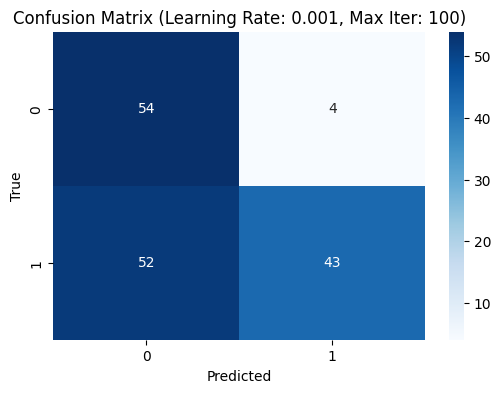


Training with Learning Rate: 0.001, Max Iterations: 1000
Fold 1, Accuracy: 0.5714, Precision: 0.9024, Recall: 0.3737, F1-Score: 0.5286
Fold 2, Accuracy: 0.7338, Precision: 0.7292, Recall: 0.9813, F1-Score: 0.8367
Fold 3, Accuracy: 0.6623, Precision: 0.8060, Recall: 0.5806, F1-Score: 0.6750
Fold 4, Accuracy: 0.5425, Precision: 0.9737, Recall: 0.3491, F1-Score: 0.5139
Fold 5, Accuracy: 0.6667, Precision: 0.8667, Recall: 0.5474, F1-Score: 0.6710


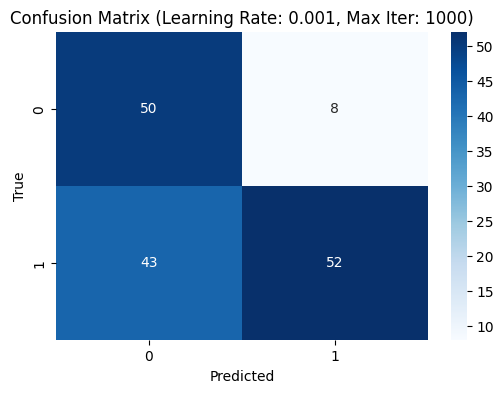


Training with Learning Rate: 0.001, Max Iterations: 5000
Fold 1, Accuracy: 0.5325, Precision: 0.8857, Recall: 0.3131, F1-Score: 0.4627
Fold 2, Accuracy: 0.7273, Precision: 0.7372, Recall: 0.9439, F1-Score: 0.8279
Fold 3, Accuracy: 0.4221, Precision: 0.7500, Recall: 0.0645, F1-Score: 0.1188
Fold 4, Accuracy: 0.7124, Precision: 0.8690, Recall: 0.6887, F1-Score: 0.7684
Fold 5, Accuracy: 0.7059, Precision: 0.8906, Recall: 0.6000, F1-Score: 0.7170


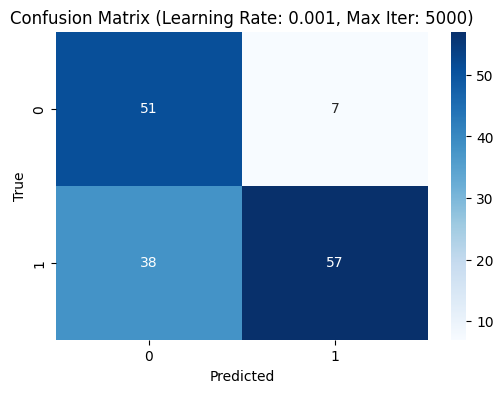


Training with Learning Rate: 0.01, Max Iterations: 100
Fold 1, Accuracy: 0.5974, Precision: 0.8936, Recall: 0.4242, F1-Score: 0.5753
Fold 2, Accuracy: 0.7403, Precision: 0.7638, Recall: 0.9065, F1-Score: 0.8291
Fold 3, Accuracy: 0.4286, Precision: 0.8571, Recall: 0.0645, F1-Score: 0.1200
Fold 4, Accuracy: 0.5229, Precision: 1.0000, Recall: 0.3113, F1-Score: 0.4748
Fold 5, Accuracy: 0.6340, Precision: 0.9149, Recall: 0.4526, F1-Score: 0.6056


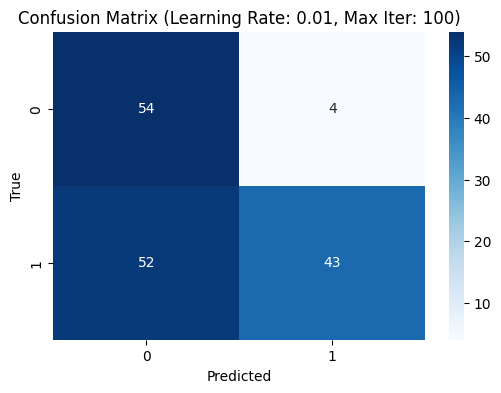


Training with Learning Rate: 0.01, Max Iterations: 1000
Fold 1, Accuracy: 0.5714, Precision: 0.9024, Recall: 0.3737, F1-Score: 0.5286
Fold 2, Accuracy: 0.7338, Precision: 0.7292, Recall: 0.9813, F1-Score: 0.8367
Fold 3, Accuracy: 0.6623, Precision: 0.8060, Recall: 0.5806, F1-Score: 0.6750
Fold 4, Accuracy: 0.5425, Precision: 0.9737, Recall: 0.3491, F1-Score: 0.5139
Fold 5, Accuracy: 0.6667, Precision: 0.8667, Recall: 0.5474, F1-Score: 0.6710


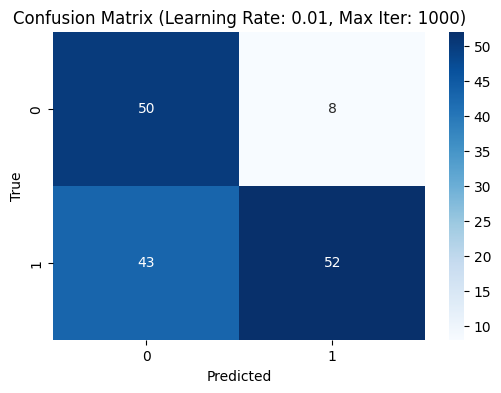


Training with Learning Rate: 0.01, Max Iterations: 5000
Fold 1, Accuracy: 0.5325, Precision: 0.8857, Recall: 0.3131, F1-Score: 0.4627
Fold 2, Accuracy: 0.7273, Precision: 0.7372, Recall: 0.9439, F1-Score: 0.8279
Fold 3, Accuracy: 0.4221, Precision: 0.7500, Recall: 0.0645, F1-Score: 0.1188
Fold 4, Accuracy: 0.7124, Precision: 0.8690, Recall: 0.6887, F1-Score: 0.7684
Fold 5, Accuracy: 0.7059, Precision: 0.8906, Recall: 0.6000, F1-Score: 0.7170


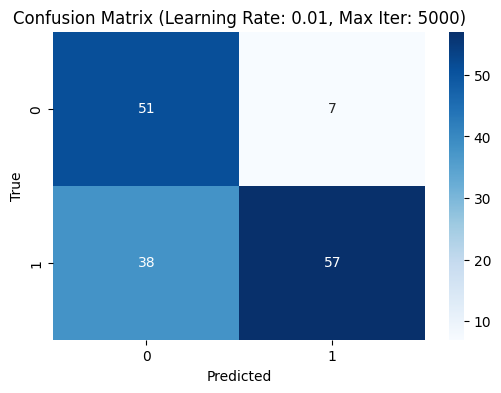


Training with Learning Rate: 0.1, Max Iterations: 100
Fold 1, Accuracy: 0.5974, Precision: 0.8936, Recall: 0.4242, F1-Score: 0.5753
Fold 2, Accuracy: 0.7403, Precision: 0.7638, Recall: 0.9065, F1-Score: 0.8291
Fold 3, Accuracy: 0.4286, Precision: 0.8571, Recall: 0.0645, F1-Score: 0.1200
Fold 4, Accuracy: 0.5229, Precision: 1.0000, Recall: 0.3113, F1-Score: 0.4748
Fold 5, Accuracy: 0.6340, Precision: 0.9149, Recall: 0.4526, F1-Score: 0.6056


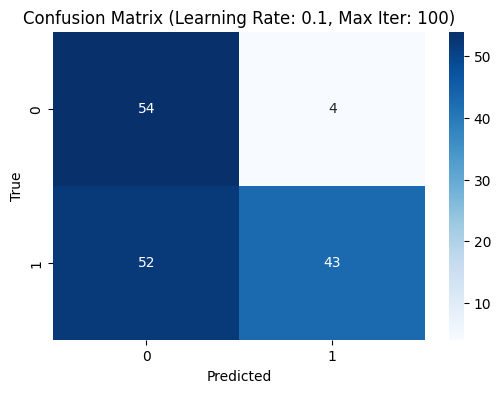


Training with Learning Rate: 0.1, Max Iterations: 1000
Fold 1, Accuracy: 0.5714, Precision: 0.9024, Recall: 0.3737, F1-Score: 0.5286
Fold 2, Accuracy: 0.7338, Precision: 0.7292, Recall: 0.9813, F1-Score: 0.8367
Fold 3, Accuracy: 0.6623, Precision: 0.8060, Recall: 0.5806, F1-Score: 0.6750
Fold 4, Accuracy: 0.5425, Precision: 0.9737, Recall: 0.3491, F1-Score: 0.5139
Fold 5, Accuracy: 0.6667, Precision: 0.8667, Recall: 0.5474, F1-Score: 0.6710


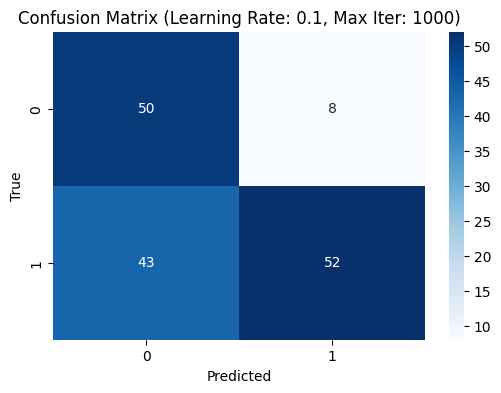


Training with Learning Rate: 0.1, Max Iterations: 5000
Fold 1, Accuracy: 0.5325, Precision: 0.8857, Recall: 0.3131, F1-Score: 0.4627
Fold 2, Accuracy: 0.7273, Precision: 0.7372, Recall: 0.9439, F1-Score: 0.8279
Fold 3, Accuracy: 0.4221, Precision: 0.7500, Recall: 0.0645, F1-Score: 0.1188
Fold 4, Accuracy: 0.7124, Precision: 0.8690, Recall: 0.6887, F1-Score: 0.7684
Fold 5, Accuracy: 0.7059, Precision: 0.8906, Recall: 0.6000, F1-Score: 0.7170


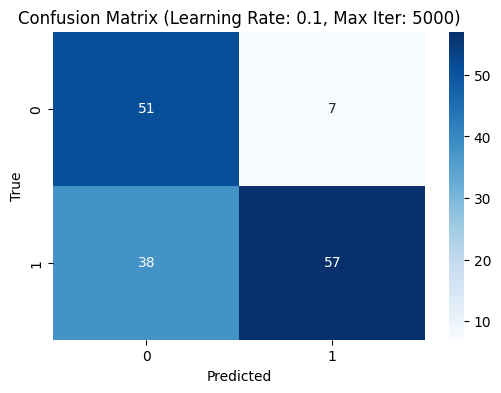

In [14]:
# Converting to NumPy arrays
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
max_iters = [100, 1000, 5000]

all_metrics = {}

for lr in learning_rates:
    for max_iter in max_iters:
        print(f"\nTraining with Learning Rate: {lr}, Max Iterations: {max_iter}")
        metrics = cross_val_perceptron(X, y, learning_rate=lr, max_iter=max_iter)
        all_metrics[(lr, max_iter)] = metrics


In [15]:
def aggregate_results(all_metrics):
    aggregated_results = {}

    for (lr, max_iter), metrics in all_metrics.items():
        avg_accuracy = np.mean(metrics['accuracy'])
        avg_precision = np.mean(metrics['precision'])
        avg_recall = np.mean(metrics['recall'])
        avg_f1 = np.mean(metrics['f1_score'])

        aggregated_results[(lr, max_iter)] = {
            'accuracy': avg_accuracy,
            'precision': avg_precision,
            'recall': avg_recall,
            'f1_score': avg_f1
        }
        
        print(f"Results for LR: {lr}, Max Iter: {max_iter}")
        print(f"Accuracy: {avg_accuracy:.4f}, Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1-Score: {avg_f1:.4f}\n")
    
    return aggregated_results

# results
aggregated_results = aggregate_results(all_metrics)

Results for LR: 0.001, Max Iter: 100
Accuracy: 0.5846, Precision: 0.8859, Recall: 0.4319, F1-Score: 0.5210

Results for LR: 0.001, Max Iter: 1000
Accuracy: 0.6353, Precision: 0.8556, Recall: 0.5664, F1-Score: 0.6450

Results for LR: 0.001, Max Iter: 5000
Accuracy: 0.6200, Precision: 0.8265, Recall: 0.5221, F1-Score: 0.5790

Results for LR: 0.01, Max Iter: 100
Accuracy: 0.5846, Precision: 0.8859, Recall: 0.4319, F1-Score: 0.5210

Results for LR: 0.01, Max Iter: 1000
Accuracy: 0.6353, Precision: 0.8556, Recall: 0.5664, F1-Score: 0.6450

Results for LR: 0.01, Max Iter: 5000
Accuracy: 0.6200, Precision: 0.8265, Recall: 0.5221, F1-Score: 0.5790

Results for LR: 0.1, Max Iter: 100
Accuracy: 0.5846, Precision: 0.8859, Recall: 0.4319, F1-Score: 0.5210

Results for LR: 0.1, Max Iter: 1000
Accuracy: 0.6353, Precision: 0.8556, Recall: 0.5664, F1-Score: 0.6450

Results for LR: 0.1, Max Iter: 5000
Accuracy: 0.6200, Precision: 0.8265, Recall: 0.5221, F1-Score: 0.5790



Learning Curves

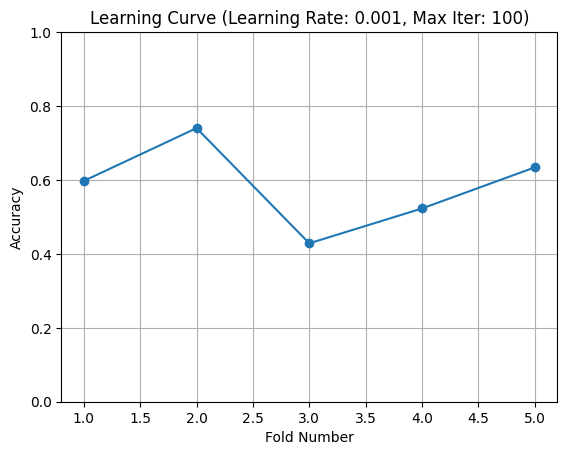

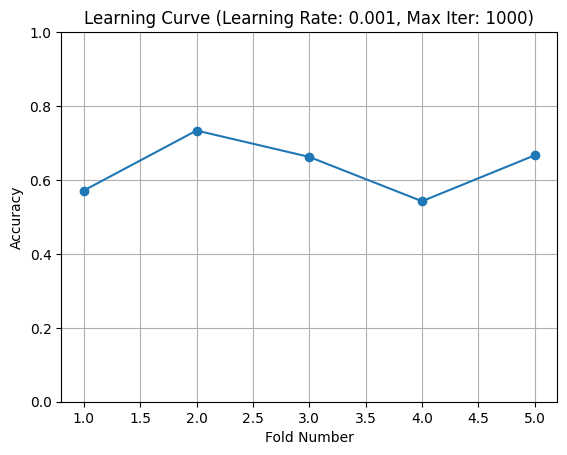

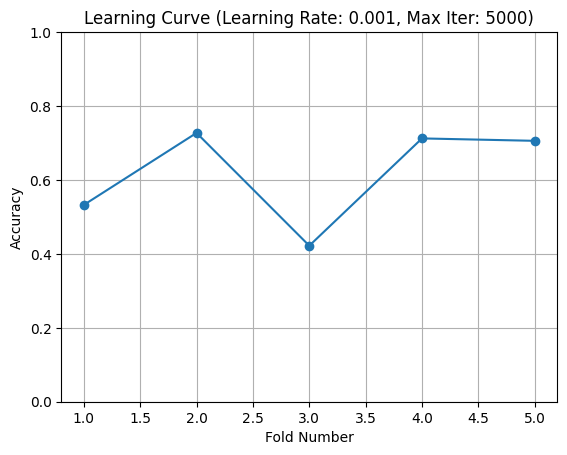

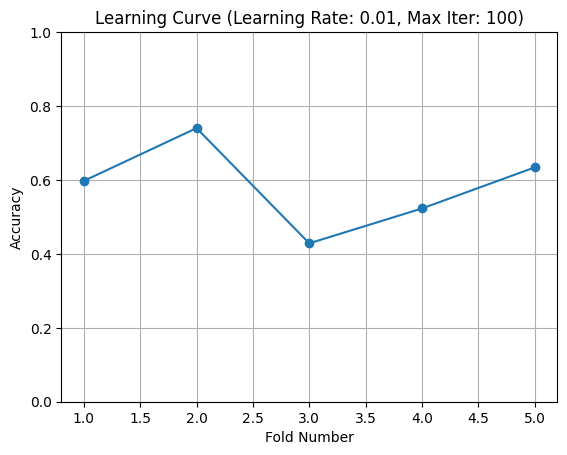

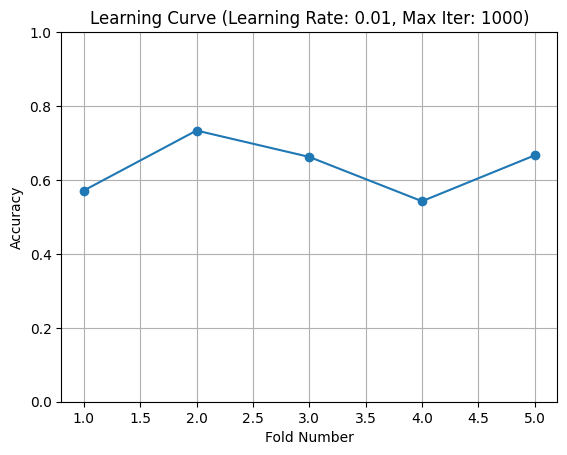

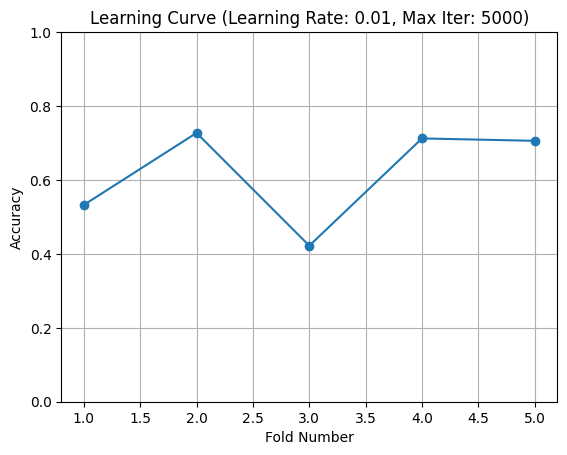

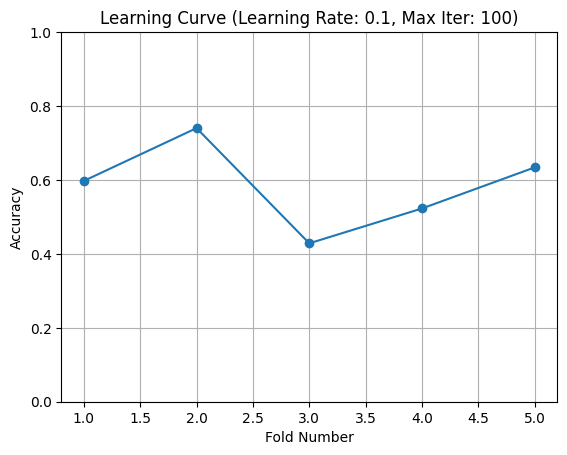

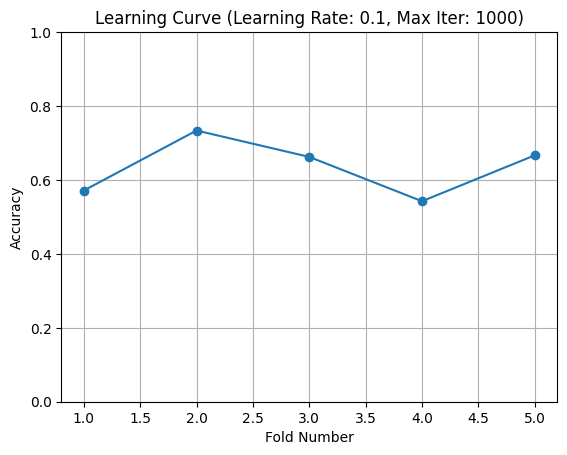

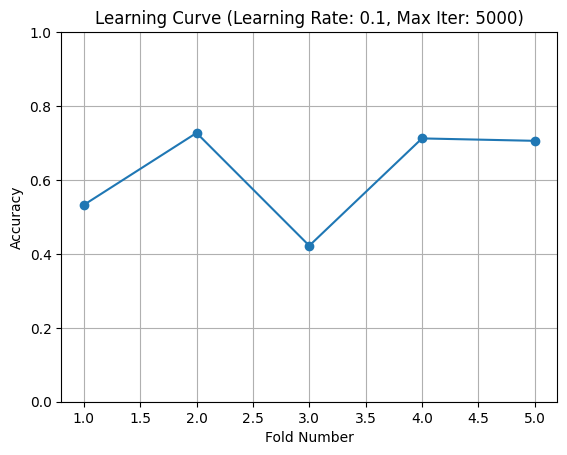

In [16]:
def plot_learning_curves_and_save(metrics, lr, max_iter, k_folds=5):
    accuracies = metrics['accuracy']
    
    # Plotting learning curve for accuracy
    plt.plot(range(1, k_folds+1), accuracies, marker='o')
    plt.title(f'Learning Curve (Learning Rate: {lr}, Max Iter: {max_iter})')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.grid(True)
    plt.savefig(f'learning_curve_lr_{lr}_iter_{max_iter}.png')
    plt.show()

for (lr, max_iter), metrics in all_metrics.items():
    plot_learning_curves_and_save(metrics, lr, max_iter)